In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [4]:
X = tf.placeholder(tf.float32, [None, n_input])

In [6]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [7]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [9]:
#cost function
cost = tf.reduce_mean(tf.pow(X -decoder, 2))

In [10]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html

# Stochastic Gradient Descent 

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(training_epoch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.0163
Epoch: 0002 Avg. cost = 0.0164
Epoch: 0003 Avg. cost = 0.0163
Epoch: 0004 Avg. cost = 0.0163
Epoch: 0005 Avg. cost = 0.0162
Epoch: 0006 Avg. cost = 0.0160
Epoch: 0007 Avg. cost = 0.0153
Epoch: 0008 Avg. cost = 0.0136
Epoch: 0009 Avg. cost = 0.0098
Epoch: 0010 Avg. cost = 0.0062
Epoch: 0011 Avg. cost = 0.0049
Epoch: 0012 Avg. cost = 0.0044
Epoch: 0013 Avg. cost = 0.0040
Epoch: 0014 Avg. cost = 0.0037
Epoch: 0015 Avg. cost = 0.0035
Epoch: 0016 Avg. cost = 0.0033
Epoch: 0017 Avg. cost = 0.0032
Epoch: 0018 Avg. cost = 0.0031
Epoch: 0019 Avg. cost = 0.0030
Epoch: 0020 Avg. cost = 0.0029
최적화 완료!


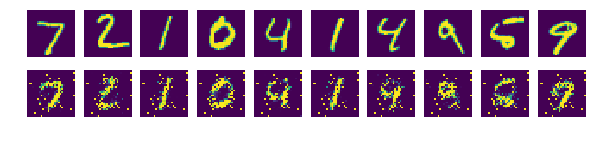

In [13]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()